# Start
***
### Machine learning: The problem setting
A learning problem reviews a set of n tests of data and then attempts to predict unknown data as to the name Machine Learning. It learns as it goes and gets smarter everytime it runs a differnt peice of code.
If each test is more than a single integer such as an array of numbers it has multiple attributes.
- Supervissed learning: is when we have data with additional attributes and we want to predict them.
 - Classification: is a problem of id'ing which list an study belongs to. One way to think of this is having a discrte way of way of supervised learning and one only has a certain amount of categories, and for each N sample that is given has to put them in the right place.
  - Regression: if the output is the same then we have run into regression. An example of this is when you try to predict something it wont give the right answer or give the same answer everytime.
- Unsupervised learning: the training data that is used is a set of input vectors and having no similar target values. The aim is to have some problems and have them find the same examples in the dataset. This is called clustering.
***

### Loading an example dataset.

[Scikit-Learn](https://scikit-learn.org/stable/tutorial/index.html) comes with some standard datasets for example iris and digits for classification and the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

A Dataset is an object that acts in a dictonary-like way and has some data and metadata. This is all stored in the .data member, which are two different arrays called samples and features. With using the supervised problem response vars are stored in the .target memeber.

In [2]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**digits.data** gives you digits samples and **digits.target** gives you true values of the dataset,

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

The way the data is shown is always in a 2D array. The shape of the array is (samples,features). The inital data mey take a different shape but in the case of the way the digits each inital sample image shape is an 8*8 array.

***
### Learning and predicting
Using the digits dataset, There is samples of each of the 10 possible classes on where we can fit an **estimator**(which is a rule for calculating an estimate of given quantity based on observed data) to predict unseen samples.

But in scikit-learn, an estimator for grouping is a Python object that implements the methods fit() and predict()

An example of the use of estimator is sklearn.svm.SVC, which applies support for vector classification. The estimators constructor takes the models parameters as arguments.

In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

**clf** (classifier) estimator instance is the first thing added to the model and must learn from it. 
This is done by passing it to the fit method. With the training set, we use all but the last image in the dataset which we use to do our predicting.

In [6]:
clf.fit(digits.data[:-1], digits.target[:-1])
svm.SVC(C=100.0, gamma=0.001)

SVC(C=100.0, gamma=0.001)

Now we can predict new values, in this instance we use the last image to do the work for use using digits.data. 

In [7]:
clf.predict(digits.data[-1:])


array([8])

***
### Conventions

Estimators follow rules that make their behavior more predictive.

##### Type casting
- Unless told otherwise, input will be cast to foat64:

In [8]:
# importing needed libraries
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

The snippent of code above shows that dtype is a float32 but is cast to a float64. Regression targets are cast to float64.

In [9]:
# importing needed libraries
from sklearn import datasets
from sklearn.svm import SVC

#setting variables.
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [10]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [11]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

 - with using **fit()** it will return an integer array, But with using **predict()** you will get back a string array. This shows the different uses between the two and in what way to use them.

***
### Refitting and updating parameters.

- In the code below we will be using **set_params()** method instead of using fit() multiple times as it would just overrite what is needed.

In [12]:
# importing libraries
import numpy as np
from sklearn.datasets import load_iris

# setting vars
X,y = load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(kernel='linear')

In [13]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [14]:
clf.set_params(kernel='rbf').fit(X, y)

SVC()

In [15]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In the snippets above rbf kernel is change to linear from using **SVC.set_params** after it has been set in the constructor and is then changed back to rbf to refit the esitmator so it can make another prediction but it comes back with he same answer.

***
### Multiclass vs. multilabel fitting

- With using multiclass classifiers, learning and predictions is all down to how the format of the way the data is fit. Such as one vs all, one vs one and one vs the rest. These estimators are meta estimators, they need a base estimator to use in the constructor. For example we can use estimators to turn binary classifiers to a multiclass classifier.

- With the code below you have OneVsRest. This consists of fitting one classifier per class. More about this can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

x = [[6,10], [4,7], [3,8], [5,10], [11,4]]
y = [2,4,6,1,7]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(x,y).predict(x)

array([2, 4, 6, 1, 7])

- above you can see that the classifier is fit into a noramal array of multiclass labels using the predict() method and shows similar predictions. We can also use a 2d array to fit the data into. 

In [17]:
y = LabelBinarizer().fit_transform(y)
classif.fit(x,y).predict(x)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

- In the above code you can see the the classifier if fit() to 2d array in the shape of **y** by using [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier). Using LabelBinarizer is a group of regression and binary classification algorithms. Such as fit(), fit_transform() and get_params([]) this one in particular gets the parameters for a certain estimator you pass in

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[2,6], [4,7], [5,2], [1,3], [6,3]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(x,y).predict(x)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0]])

- In the code above the classifier is fit onto instances that are assigned multiple labels. MultiLabelBinarizer is used on the 2d array of multilabels to fit on. Predict() returns a 2d array that has predicted labels for each instance.

***
# End

# Nearest Neighbor Start
***

### Supervised Learning with Classification and Regression

##### Problem solving with Supervised learning
- Supervised learning incorporates in learning the link between two datasets: the percived data x and the external variable y that we will try to perdict, these are usually called "target" or "labels". Usually y is a 1d array of length *n_samples*. 
- All supervised estimators in scikit are implemented by the ***fit()*** method to fit to the model that is the ***predict()*** method, when given unlabeled study x, returns the prediction of labels y
***
### k-Nearest Neighbors classifier

- The simplest possible is the nearest neighbor:  ( **is when the you find the distance between a query and all of its examples in the data and picking a number of examples (K) closest to the query and then votes for the one that is there most often.** )
***

### Nearest neighbor and the curse of dimensionality

In [19]:
# imports from libraries on machine learning in sklearn
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris_data = load_iris()


In [22]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [64]:
#target = 'Classified Data'
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Underfitting and Overfitting
**Underfit**: not enough data to make a good prediction

**Overfit**: the perfect amount of data and not good for data that cannot be seen
***
**Cross Validation**: split data to k folds, one fold for training and one for testing and get the average of both
***

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
x = iris_data.data
y = iris_data.target
k = KNeighborsClassifier(n_neighbors = 10)
pre = cross_val_predict(k,x,y,cv=5)

In [26]:
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

***
### Evaluation
**Mean Error**: average of the actual and predicted values and if you have the number lower that is better.

**R2**: differance between dependant and independant and unlike Mean error the higher the number the better.

In [27]:
# importing more needed libraries from sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
print(r2_score(y,pre))

0.97


In [29]:
e = []
for i in range(1,51):
    k = KNeighborsClassifier(n_neighbors = i)
    pre = cross_val_predict(k,x,y, cv = 5)
    e.append(mean_squared_error(y,pre))

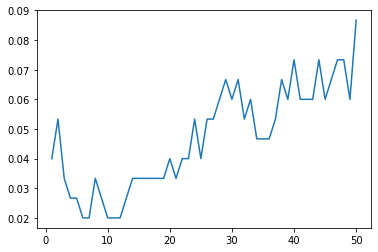

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1,51), e)

In [31]:
from sklearn.datasets import load_boston

In [32]:
boston = load_boston()
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [33]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [34]:
x = boston.data
y = boston.target
kn = KNeighborsRegressor(n_neighbors = 10)
pred = cross_val_predict(kn,x,y,cv=5)

In [35]:
pred

array([24.  , 26.17, 21.95, 23.09, 21.99, 21.95, 23.72, 22.32, 23.54,
       27.12, 24.93, 22.62, 23.56, 22.63, 31.44, 23.75, 27.76, 27.38,
       25.43, 24.88, 27.33, 22.32, 22.32, 24.54, 22.32, 29.31, 31.44,
       29.31, 26.45, 31.44, 31.52, 28.19, 20.09, 34.18, 20.09, 21.17,
       23.19, 23.67, 24.47, 35.55, 33.77, 23.99, 23.99, 23.99, 21.66,
       21.65, 21.65, 30.28, 25.19, 21.95, 30.77, 31.98, 30.06, 30.06,
       31.11, 39.74, 25.23, 37.2 , 25.35, 25.61, 28.85, 36.17, 29.06,
       25.96, 28.66, 26.8 , 26.38, 27.11, 26.43, 26.43, 28.47, 28.32,
       30.27, 28.09, 25.67, 20.11, 28.54, 20.11, 20.11, 20.36, 26.85,
       32.41, 26.89, 26.01, 22.82, 25.55, 22.88, 22.79, 21.5 , 21.88,
       21.35, 21.68, 31.67, 31.17, 37.68, 25.85, 21.91, 21.81, 24.1 ,
       22.14, 19.22, 19.68, 13.62, 21.05, 21.05, 21.05, 21.05, 21.05,
       21.05, 21.05, 21.29, 20.52, 20.52, 20.52, 20.52, 19.2 , 19.34,
       20.52, 19.74, 19.6 , 28.03, 28.82, 23.98, 23.98, 25.38, 25.66,
       26.64, 20.52,

In [36]:
print(r2_score(y,pred))

0.12278604134701132


In [37]:
er = []
for j in range(1,51):
    kn = KNeighborsRegressor(n_neighbors = j)
    pred = cross_val_predict(kn,x,y,cv=5)
    er.append(mean_squared_error(y,pred))

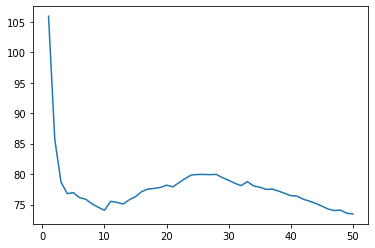

In [38]:
#plt.scatter(range(1,51),range(1,51), color="orange", label="data")
plt.plot(range(1,51),er)

### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [40]:
cp = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [41]:
yp = cross_val_predict(cp,x,y,cv=5)
print(mean_squared_error(y,yp))
print(r2_score(y,yp))

30.168073715415016
0.6426411712043607


In [42]:
error = []
for i in range(1,51):
    cp = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i))
    yp = cross_val_predict(cp,x,y,cv=5)
    error.append(mean_squared_error(y,yp))

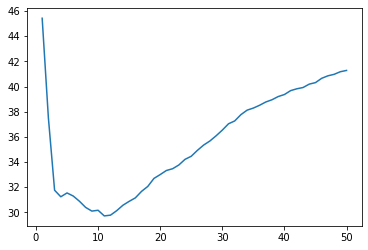

In [43]:
plt.plot(range(1,51), error)

### Compare

In [44]:
from sklearn.model_selection import KFold

In [45]:
cv = KFold(n_splits = 5, random_state = None, shuffle = False)

In [46]:
cp = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
yp = cross_val_predict(cp,x,y,cv=cv)
print(mean_squared_error(y,yp))

30.168073715415016


***
### Image Compression using K-Means (Unsupervised Learning)

In [47]:
#importing needed Sklearn,numpy,pandas and mathplot libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

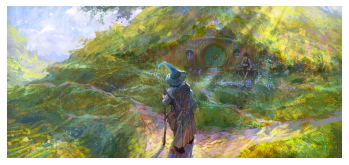

In [48]:
#bringing in the image
img = plt.imread("gandalfShire.png")
plt.imshow(img)
plt.axis('off')
plt.show()

- The image gets read in as an array becasue it has certain pixels that comprize the image together and then those images are read in and joins them together to for the image when it is then read in as a numpy array[].

In [49]:
#the image doesnt get read in as an image but as an array
type(img)

numpy.ndarray

In [50]:
print(img.shape)#rows,cols, channels. If the channel was to be set to 1 it would be turned into greyscale

(405, 895, 3)


In [51]:
print(img.size)#total number of rows * cols * channel which will be printed on next line
print(405*895*3)

1087425
1087425


In [52]:
# resizing the image from a 3d to a 2d
w,h,d = img.shape
img_array = img.reshape(w*h, d)
print(img_array.shape)

(362475, 3)


In [53]:
#normalize the range of (0,1)
img_array = img_array/255
print(img_array)

[[0.00230681 0.00270665 0.00346021]
 [0.00233756 0.00276817 0.00350634]
 [0.00241446 0.00276817 0.0035371 ]
 ...
 [0.00152249 0.00163014 0.00055363]
 [0.00130719 0.0014456  0.00047674]
 [0.00086121 0.00099962 0.00027682]]


***
### Extracting pixels
- here i will take out a subset from the pixel array and then apply it to the whole image, **this will help train the model**

In [54]:
#importing needed lib from sklearn
from sklearn.utils import shuffle
# fitting the model to subset of pixels
img_sample = shuffle(img_array, random_state=1)[:1000] # this 1000 takes the first 1000 pixels from the image
img_sample.size

3000

***
##### Making the Clusters

In [55]:
# in here we set the amount of clusters to work with
kmeans = KMeans(n_clusters=6, random_state=1)
print(kmeans.fit(img_array))

KMeans(n_clusters=6, random_state=1)


In [56]:
#fitting the 
l = kmeans.predict(img_array)
l

array([4, 4, 4, ..., 2, 5, 5], dtype=int32)

***
##### Center of clusters
- finding the center for all the clusters that have been made

In [60]:
#cluster centers
km = kmeans.cluster_centers_
print(km)

[[0.00199864 0.00221202 0.00199678]
 [0.00323207 0.00314574 0.00205715]
 [0.00170852 0.0018358  0.00096369]
 [0.00268773 0.0025961  0.00095748]
 [0.00322986 0.00335594 0.00367844]
 [0.00113114 0.00128318 0.0009026 ]]


In [61]:
def remake_Image(km,l,w,h,d):
    #fills w,h,d with 0's
    image=np.zeros((w,h,d))
    index=0
    #labels for the pixels
    for i in range(w):#i for width
        for j in range(h):#j for height
            img[i][j] = km[l[index]]
            index+=1
        return(img)

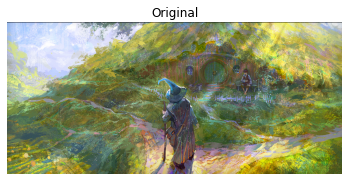

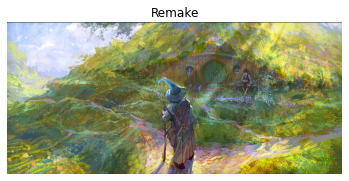

In [62]:
#orignial image
plt.figure(1)
plt.axis('off')
plt.title("Original")
plt.imshow(img)
plt.show()
#printing the new image of the original
plt.figure(2)
plt.axis('off')
plt.title("Remake")
plt.imshow(remake_Image(km,l,w,h,d))
plt.show()

***
### END
***